## Integrals Over Infinite Ranges

* Change of variables
    - For the range $(0,\infty)$, use $z=x/(1+x)$ or $z=x/(c+x)$ (for any constant value $c$) substitution.
    - For the range $(a,\infty)$, use $y=x-a$ and then $z=y/(c+y)$ substitution.
    - For the range $(-\infty,a)$, use $z\rightarrow -z$ in the above substitution.
    - For the range $(-\infty,\infty)$, divide the range into $(-\infty,0)$ and $(0,\infty)$ or $(-\infty,a)$ and $(a,\infty)$. Alternatively, use $x=\tan z$.

## Integrate $\int_0^\infty e^{-t^2}$

In [1]:
import numpy as np

# Function to calculate sample points an weights for Gaussian quadrature
def gaussxw(N): # N is the number of sample points and order of Gaussian approximation to the integral

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Finding roots (or nodes) using Newton's method (will be taught soon)
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculating the weights using standard interval for Legendre polynomial
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

In [6]:
true_val = np.sqrt(np.pi)/2

def f(z):
    t = z/(1-z)
    return np.exp(-t*t)/(1-z)**2

N = 50
a = 0.0
b = 1.0

x, w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])
    
print(s,true_val)

0.8862269254528349 0.8862269254527579


## Multiple Integrals

The easiest thing to do is to compute integrations over different quantities one after another. Applying the Gaussian quadrature method, for example, gives the Gauss-Legendre product formula.
$$ I = \int_0^1\int_0^1 f(x,y) \ dx\ dy \simeq \sum_{i=1}^N\sum_{i=1}^N w_iw_jf(x_i.y_j) $$

### Gravitational pull of a uniform sheet

The gravitational force due to a square sheet at some distance $z$ from it is given by
$$ F_z = G\sigma z\int\int_{-L/2}^{L/2}\frac{dx\ dy}{(x^2+y^2+z^2)^{3/2}} $$
where G is the gravitational constant and $\sigma$ is the mass per unit area.  
The sheet weighs $10^4$ kg and has a side measuring 10 m.

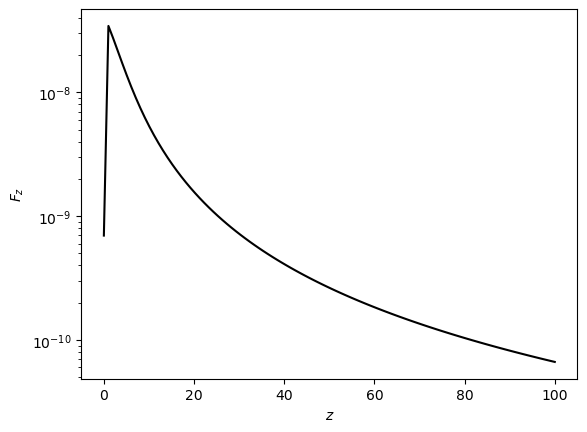

In [40]:
import matplotlib.pyplot as plt

G     = 6.67e-11   # gravitational constant in SI unit
sigma = 100        # mass per unit area of the sheet

def r3inv(x,y,z):
    return pow(x*x+y*y+z*z,-3/2)

nz = 100
z  = np.linspace(1e-3,100,nz) # fixed z-axis
Fz = np.zeros(nz)         # creating an empty list to store force at some z
I  = np.zeros(nz)         # storing the integration values

N = 100
a = -5
b = 5

x, w = gaussxw(N)
xp = yp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

for k in range(nz):    # calculating force Fz for each z
    s = 0.0
    for j in range(N):
        for i in range(N):
            s += wp[j]*wp[i]*r3inv(xp[i],yp[j],z[k])
    Fz[k] = G*sigma*z[k]*s
    I[k] = s

# plotting force vs z
plt.plot(z,Fz,'k')
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$F_z$')
plt.show()

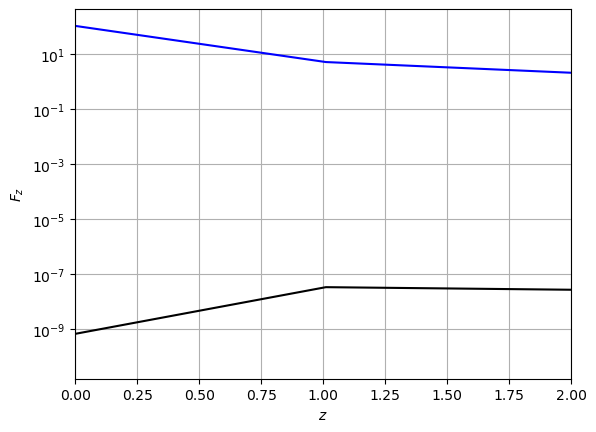

In [42]:
plt.plot(z,Fz,'k')
plt.plot(z,I,'b')
plt.xlim(0,2)
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$F_z$')
plt.grid()
plt.show()

Below $z=1$, the integration value does not increase proportionately. The majority contribution to gravity should come from the points very close on the sheet. Increasing the number of points near $(x,y,z)=(0,0,0)$ solves half the problem.  
The general method to remove this numerical artifact is to do the substitution $X=x/z$, $Y=y/z$:
$$ F_z = G\sigma \iint_{-L/2z}^{L/2z} \frac{ dX\ dY}{(X^2+Y^2+1)^{3/2}} $$
The explicitly dependence on $z$ is not encapsulated by the limits of the integration. This alone will not take care of the problem, since the two forms are equivalent.

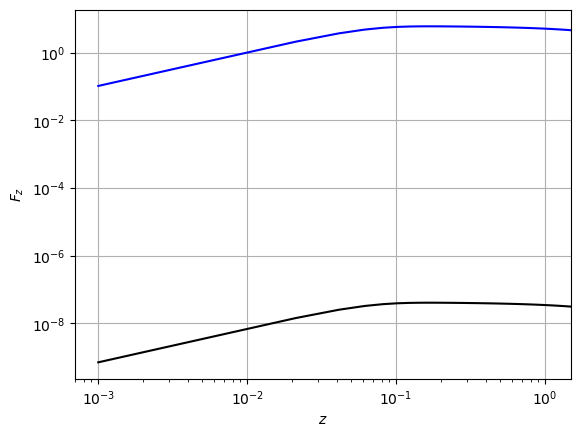

In [51]:
def r3ninv(x,y):
    return pow(x*x+y*y+1,-3/2)

nz = 100
z  = np.linspace(1e-3,2,nz) # fixed z-axis
Fz = np.zeros(nz)         # creating an empty list to store force at some z
I  = np.zeros(nz)         # storing the integration values

for k in range(nz):    # calculating force Fz for each z
    a = -5/z[k]
    b = 5/z[k]
    x, w = gaussxw(N)
    xp = yp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    s = 0.0
    for j in range(N):
        for i in range(N):
            s += wp[j]*wp[i]*r3ninv(xp[i],yp[j])
    Fz[k] = G*sigma*s
    I[k]  = s

# plotting force vs z
plt.plot(z,Fz,'k')
plt.plot(z,I,'b')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$F_z$')
plt.xlim(7e-4,1.5)
plt.grid()
plt.show()

For $z\to0$, the limits of integration become $(-\infty,\infty)$. We can then try the substitution, $X=\tan\theta$, $Y=\tan\phi$, making the integration:
$$ F_z \to G\sigma \iint_{-\pi/2}^{\pi/2} \frac{\sec^2\theta\sec^2\phi \ d\theta\ d\phi}{(\tan^2\theta+\tan^2\phi+1)^{3/2}} $$

In [38]:
def r3nsphinv(theta,phi):
    return pow(np.tan(theta)**2+np.tan(phi)**2+1,-3/2)/pow(np.cos(theta),2)/pow(np.cos(phi),2)

N = 100
a = -np.pi/2
b = np.pi/2
x, w = gaussxw(N)
xp = yp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w
    
s = 0.0
for j in range(N):
    for i in range(N):
        s += wp[j]*wp[i]*r3nsphinv(xp[i],yp[j])
Fz = G*sigma*s

print("near z=0, Fz tends to",Fz)

near z=0, Fz tends to 4.191548589767806e-08


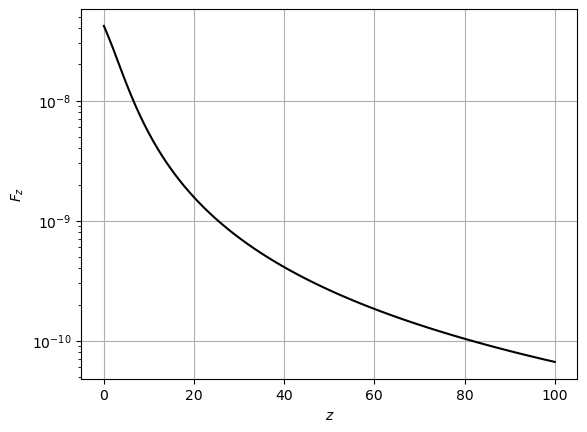

In [55]:
# final resolution
def r3ninv(x,y):
    return pow(x*x+y*y+1,-3/2)

nz = 100
z  = np.linspace(5e-2,100,nz+1) # fixed z-axis
Fz = np.zeros(nz+1)         # creating an empty list to store force at some z
I  = np.zeros(nz+1)         # storing the integration values
N  = 100

for k in range(1,nz+1):    # calculating force Fz for each z
    a = -5/z[k]
    b = 5/z[k]
    x, w = gaussxw(N)
    xp = yp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    s = 0.0
    for j in range(N):
        for i in range(N):
            s += wp[j]*wp[i]*r3ninv(xp[i],yp[j])
    Fz[k] = G*sigma*s
    I[k]  = s

N = 100
a = -np.pi/2
b = np.pi/2
x, w = gaussxw(N)
xp = yp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w
    
s = 0.0
for j in range(N):
    for i in range(N):
        s += wp[j]*wp[i]*r3nsphinv(xp[i],yp[j])
Fz[0] = G*sigma*s
I[0]  = s

# plotting force vs z
plt.plot(z,Fz,'k')
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$F_z$')
plt.grid()
plt.show()

## Derivatives

* Developed later, since most derivatives can be calculated analytically
* Unavoidable errors

* Forward difference:
$$ f^\prime(x) \simeq \frac{f(x+h)-f(x)}{h} $$
* Backward difference:
$$ f^\prime(x) \simeq \frac{f(x)-f(x-h)}{h} $$
* Central difference:
$$ f^\prime(x) \simeq \frac{f(x+h/2)-f(x-h/2)}{h} $$

### Error analysis

Prone to both roubding and approximation errors.  
* Forward/backward difference $\epsilon \sim \frac{1}{2}hf^{\prime\prime}(x) $
* Central difference $\epsilon \sim \frac{1}{24}h^2f^{\prime\prime\prime}(x) $

For **Sampled Function**, central difference is only better if:
$$ h < \left|\frac{f^{\prime\prime}(x)}{f^{\prime\prime\prime}(x)} \right| $$

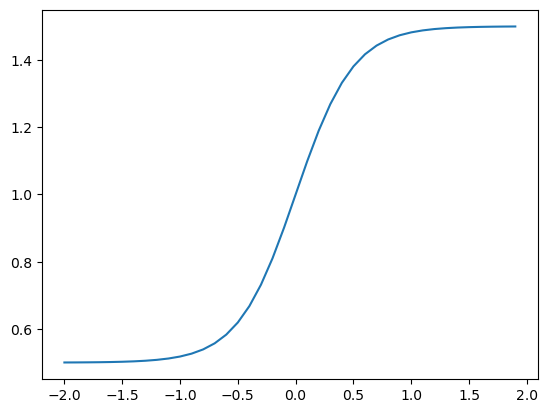

In [56]:
import matplotlib.pyplot as plt

def func(x):
    return 1+0.5*np.tanh(2*x)

h = 0.1
a, b = -2, 2
x = np.arange(a,b,h)
plt.plot(x,func(x))

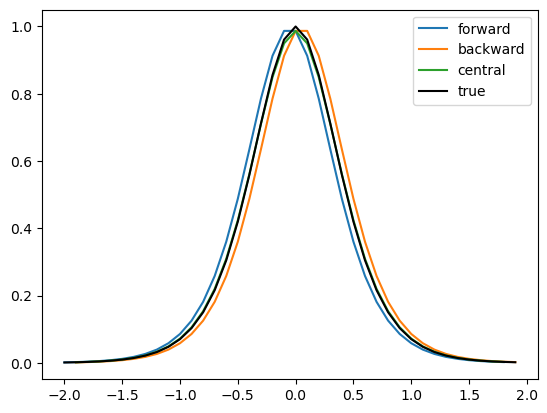

In [58]:
y = func(x)
dydx = []

# forward difference
for i in range(len(x)-1):
    dydx.append((y[i+1]-y[i])/h)
plt.plot(x[:-1],dydx,label='forward')

dydx = []
# backward difference
for i in range(1,len(x)):
    dydx.append((y[i]-y[i-1])/h)
plt.plot(x[1:],dydx,label='backward')

dydx = []
# central difference
for i in range(1,len(x)-1):
    dydx.append((y[i+1]-y[i-1])/2/h)
plt.plot(x[1:-1],dydx,label='central')

# analytical derivative
def func_deriv(x):
    return 1 - np.tanh(2*x)**2

plt.plot(x,func_deriv(x),'k',label='true')
plt.legend()

# Try it yourself

### Total 4 marks

Try h = {0.01, 0.001, 0.0001} for all the cases above. Repeat the calculation with forward and central difference. Calculate the error in each case, using the analytical expression and plot them against h. Does this investigation prove the condition for sampled functions:
$$ h < \left|\frac{f^{\prime\prime}(x)}{f^{\prime\prime\prime}(x)} \right| $$

[1.e-05 1.e-04 1.e-03 1.e-02]


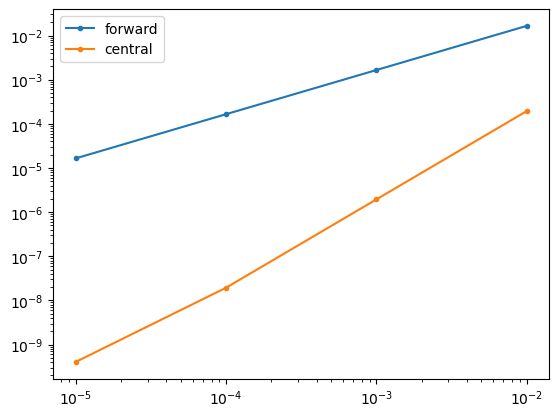

In [92]:
import numpy as np

a, b = -2, 2
he = np.arange(-5,-1,1)
hvals = 10.**he
print(hvals)

fe = []
ce = [] # lists to store errors in forward and backward differences

for h in hvals:
    x = np.arange(a,b,h)
    y = func(x)
    true = func_deriv(x)
    
    # forward difference
    dydx = []
    for i in range(len(x)-1):
        dydx.append((y[i+1]-y[i])/h)
    # calculating relative error from analytical derivative
    err = abs(np.array(dydx)-true[:-1])/true[:-1]
    fe.append(np.mean(err))   # storing the mean error
    
    dydx = []
    # central difference
    for i in range(1,len(x)-1):
        dydx.append((y[i+1]-y[i-1])/2/h)
    err = abs(np.array(dydx)-true[1:-1])/true[1:-1]
    ce.append(np.mean(err))

plt.plot(hvals,fe,marker='o',ms=3,label='forward')
plt.plot(hvals,ce,marker='o',ms=3,label='central')
plt.yscale('log')
plt.xscale('log')
plt.legend()

[1.e-07 1.e-06]


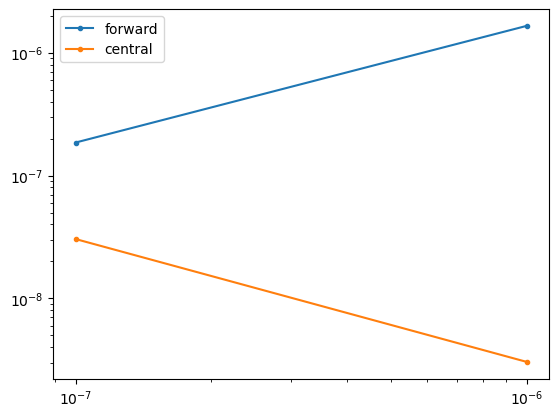

In [93]:
import numpy as np

a, b = -2, 2
he = np.arange(-7,-5,1)
hvals = 10.**he
print(hvals)

fe = []
ce = [] # lists to store errors in forward and backward differences

for h in hvals:
    x = np.arange(a,b,h)
    y = func(x)
    true = func_deriv(x)
    
    # forward difference
    dydx = []
    for i in range(len(x)-1):
        dydx.append((y[i+1]-y[i])/h)
    # calculating relative error from analytical derivative
    err = abs(np.array(dydx)-true[:-1])/true[:-1]
    fe.append(np.mean(err))   # storing the mean error
    
    dydx = []
    # central difference
    for i in range(1,len(x)-1):
        dydx.append((y[i+1]-y[i-1])/2/h)
    err = abs(np.array(dydx)-true[1:-1])/true[1:-1]
    ce.append(np.mean(err))

plt.plot(hvals,fe,marker='o',ms=3,label='forward')
plt.plot(hvals,ce,marker='o',ms=3,label='central')
plt.yscale('log')
plt.xscale('log')
plt.legend()

The difference in error between forward and central difference reduces as h goes from $10^{-6}$ to $10^{-7}$, however, this is due to convergence.

From the analytical form of the function, we get
$$ 
\begin{align}
f^\prime(x) =& 1-\tanh^2(2x) \\
f^{\prime\prime} =& 4\tanh(2x)(\tanh^2(2x) - 1) = -4\tanh(2x)f^\prime(x) \\
f^{\prime\prime\prime} =& -8 (1-\tanh^2(2x))^2 -4\tanh(2x)f^{\prime\prime}(x) = -8(f^\prime(x))^2 + 16\tanh^2(2x)f^\prime(x) \\
\implies \left|\frac{f^{\prime\prime}(x)}{f^{\prime\prime\prime}(x)} \right| =& \frac{\tanh(2x)}{2f^\prime(x)-4\tanh^2(2x)} = \frac{\tanh(2x)}{2-6\tanh^2(2x)}
\end{align}
$$
This ratio must be larger than $h$ for the forward difference error to be higher than the central difference error.